<a href="https://colab.research.google.com/github/PradnyaTayade/heart/blob/main/hd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'heart.csv', '.ipynb_checkpoints', 'sample_data']


In [139]:
data = pd.read_csv("heart.csv")

In [140]:
type(data)

pandas.core.frame.DataFrame

In [141]:
data.shape

(1025, 14)

In [142]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [279]:
data.tail()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [143]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


1. age: The person's age in years

2. sex: The person's sex (1 = male, 0 = female)

3. cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

4. trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5. chol: The person's cholesterol measurement in mg/dl

6. fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7. restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8. thalach: The person's maximum heart rate achieved

9. exang: Exercise induced angina (1 = yes; 0 = no)

10. oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

11. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12. ca: The number of major vessels (0-3)

13. thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14. target: Heart disease (0 = no, 1 = yes)

Heart disease risk factors to the following: high cholesterol, high blood pressure, diabetes, weight, family history and smoking . 

According to another source , the major factors that can't be changed are: increasing age, male gender and heredity. 

Note that thalassemia, one of the variables in this dataset, is heredity. 

Major factors that can be modified are: Smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes. 

Other factors include stress, alcohol and poor diet/nutrition.

In [145]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
690,58,1,2,105,240,0,0,154,1,0.6,1,0,3,1
312,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
687,58,1,0,125,300,0,0,171,0,0.0,2,2,3,0
621,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1


In [146]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [147]:
data.isnull().sum().sum()

0

###So, we have no missing values

In [148]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


### This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

# Exploratory Data Analysis (EDA)

1    526
0    499
Name: target, dtype: int64


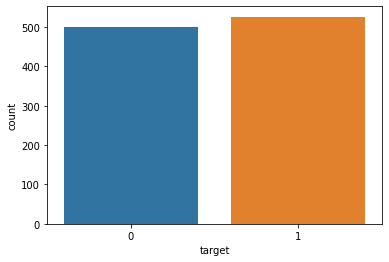

In [149]:
y = data["target"]

sns.countplot(y)


target_temp = data.target.value_counts()

print(target_temp)

# Percentage of patient with or without heart problems in the given dataset

In [280]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/1025,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/1025,2)))

Percentage of patience without heart problems: 48.68
Percentage of patience with heart problems: 51.32


In [151]:
data["sex"].unique()

array([1, 0])

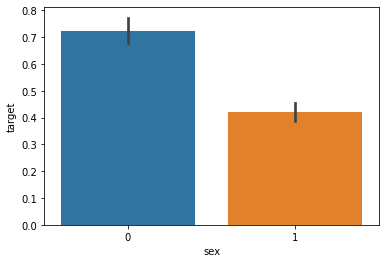

In [152]:
sns.barplot(data["sex"],y)

### Here 0 is female and 1 is male patients

In [153]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))

Percentage of Female Patients:30.44%
Percentage of Male Patients:69.56%


# Heart Disease Frequency for ages

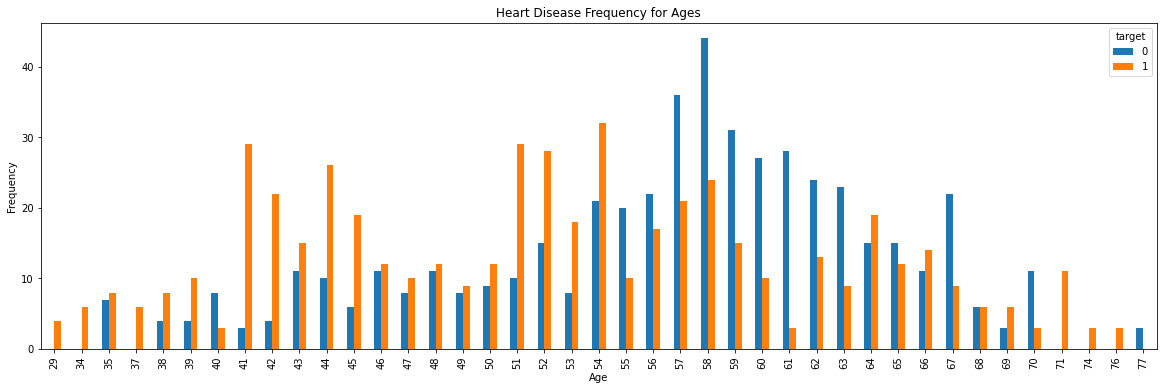

In [154]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

# Heart Disease frequency for sex (where 0 is female and 1 is male and "red" is have heart disease and "blue" is don't have heart disease)

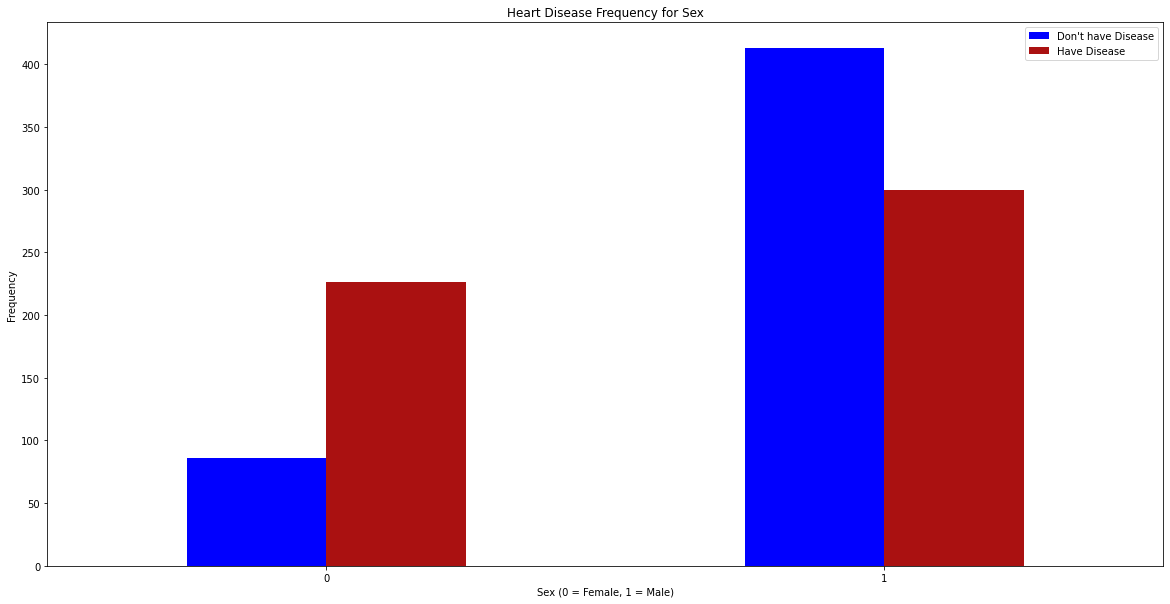

In [155]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

run this line after prediction

In [156]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

# Heart disease according to Fasting Blood sugar 

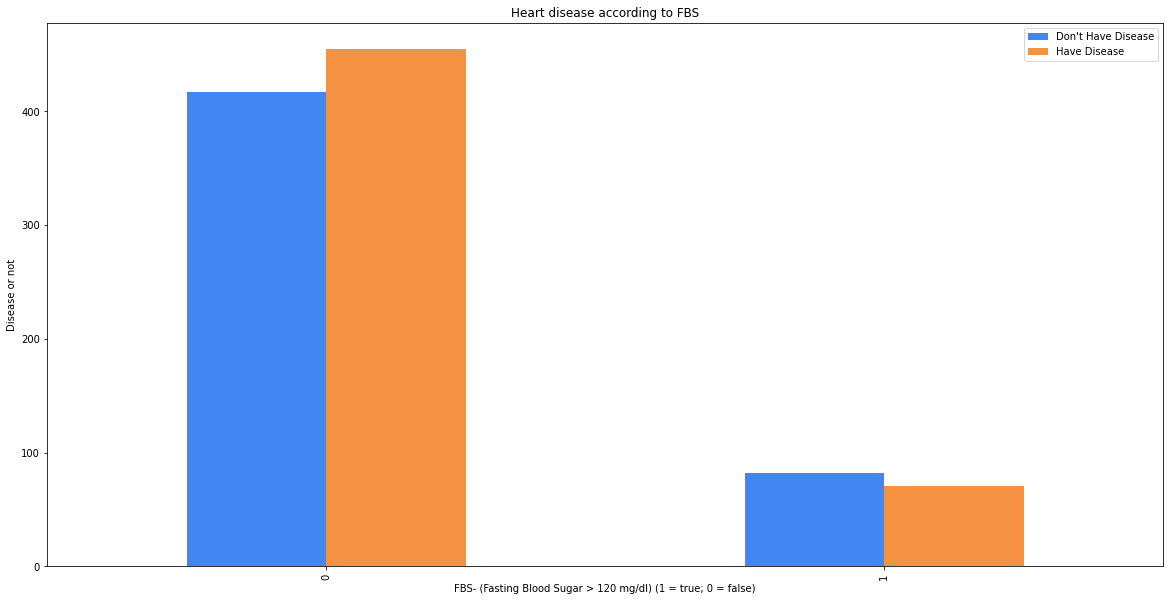

In [157]:
pd.crosstab(data.fasting_blood_sugar,data.target).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

# Analysing the chest pain (4 types of chest pain)

#[Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic]

In [158]:
data["chest_pain_type"].unique()

array([0, 1, 2, 3])

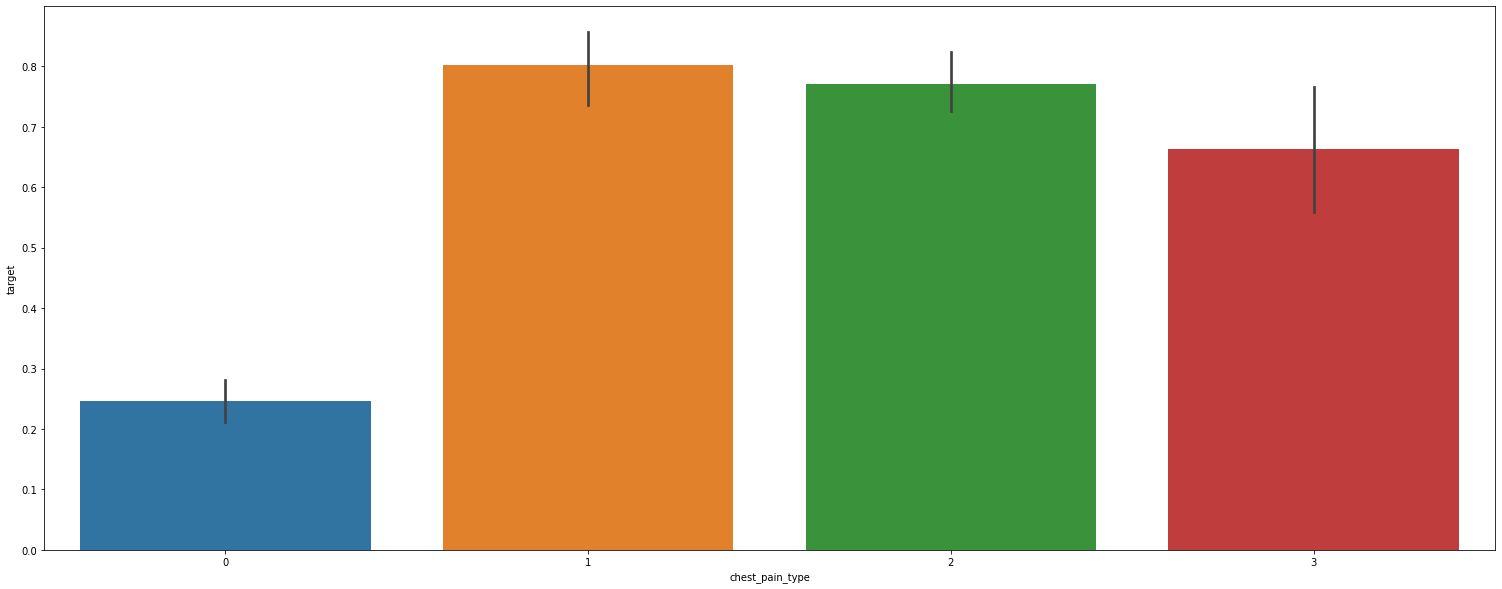

In [159]:
plt.figure(figsize=(26, 10))
sns.barplot(data["chest_pain_type"],y)

# Analysing the Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

In [162]:
data["rest_ecg"].unique()

array([1, 0, 2])

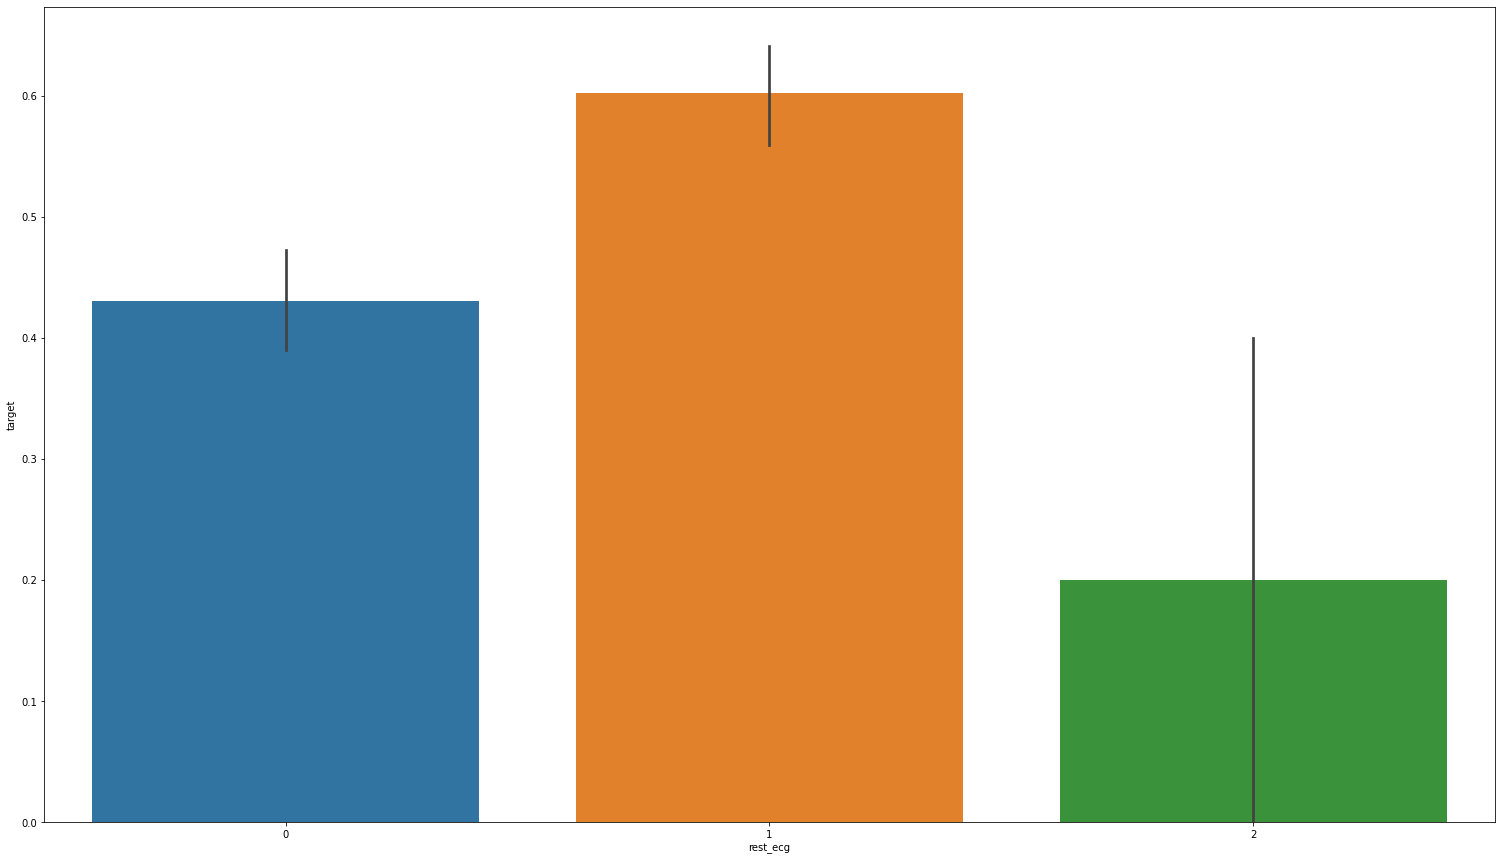

In [163]:
plt.figure(figsize=(26, 15))
sns.barplot(data["rest_ecg"],y)

## people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

#Analysing Exercise induced angina (1 = yes; 0 = no)

In [164]:
data["exercise_induced_angina"].unique()

array([0, 1])

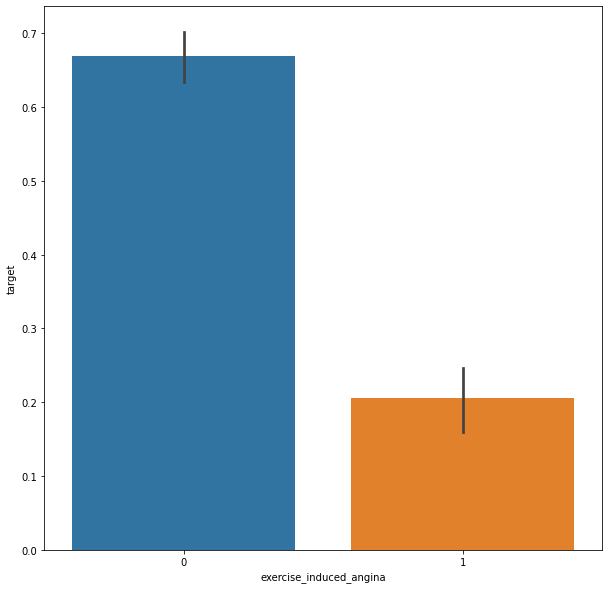

In [165]:
plt.figure(figsize=(10, 10))
sns.barplot(data["exercise_induced_angina"],y)

###People with exercise_induced_angina=1 are much less likely to have heart problems

# Analysing the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

In [166]:
data["st_slope"].unique()

array([2, 0, 1])

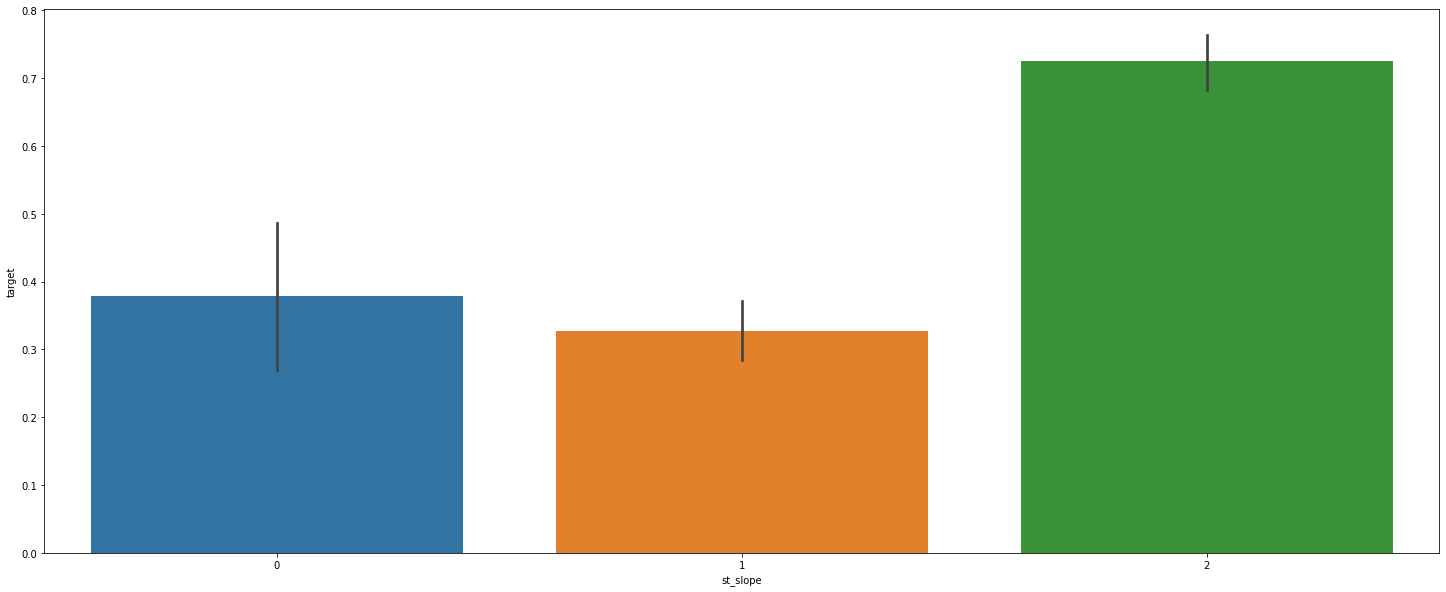

In [167]:
plt.figure(figsize=(25, 10))
sns.barplot(data["st_slope"],y)

Slope '2' causes heart pain much more than Slope '0' and '1'

# Analysing number of major vessels (0-3) colored by flourosopy

In [168]:
data["num_major_vessels"].unique()

array([2, 0, 1, 3, 4])

### count num_major vessels

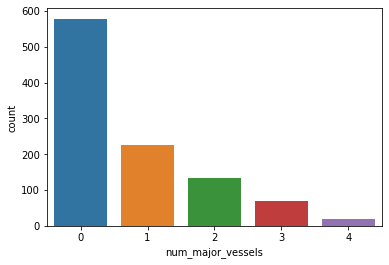

In [169]:
sns.countplot(data["num_major_vessels"])

### comparing with target

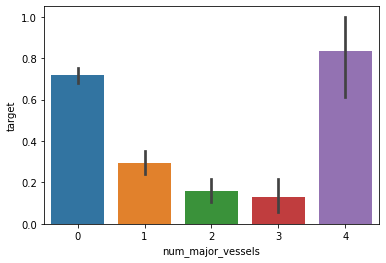

In [170]:
sns.barplot(data["num_major_vessels"],y)

### num_major_vessels=4 has astonishingly large number of heart patients

# Analysing A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)



In [171]:
data["thalassemia"].unique()

array([3, 2, 1, 0])

### plotting the thalassemia distribution (0,1,2,3)

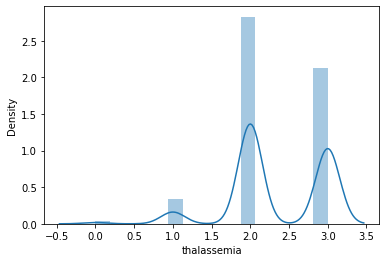

In [172]:
sns.distplot(data["thalassemia"])

### comparing with target

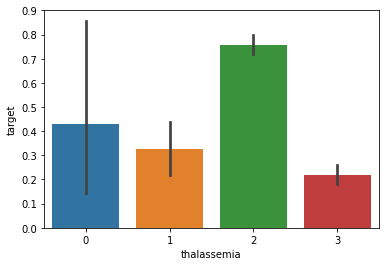

In [173]:
sns.barplot(data["thalassemia"],y)

#Threshold value

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
plot_roc_curve(model,x_train,y_train)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train,model.predict_proba(x_train)[:,1],drop_intermediate=False)

In [ ]:
plt.scatter(thresholds,np.abs(fpr+tpr-1))
plt.xlabel("Threshold")
plt.ylabel("|FPR + TPR - 1|")
plt.show()

In [ ]:
thresholds[np.argmin(np.abs(fpr+tpr-1))]

In [ ]:
threshold = []
accuracy = []

for p in np.unique(model.predict_proba(x_train)[:,1]):
  threshold.append(p)
  y_pred = (model.predict_proba(x_train)[:,1] >= p).astype(int)
  accuracy.append(balanced_accuracy_score(y_train,y_pred))

In [ ]:
plt.scatter(threshold,accuracy)
plt.xlabel("Threshold")
plt.ylabel("Balanced accuracy")
plt.show()

In [ ]:
accuracy[np.argmax(accuracy)]

In [ ]:
threshold[np.argmax(accuracy)]

# Splitting the dataset to Train and Test

In [180]:
from sklearn.model_selection import train_test_split

predictors = data.drop("target",axis=1)
target = data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 820 records and Testing features have 205 records.


In [181]:
X_train.shape

(820, 13)

In [182]:
X_test.shape

(205, 13)

In [183]:
Y_train.shape

(820,)

In [184]:
Y_test.shape

(205,)

## importing Accuracy score

In [185]:
from sklearn.metrics import accuracy_score

# Logistic regression

In [186]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, Y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, Y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, Y_test)))

Training set score: 0.862
Test set score: 0.863


In [187]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [188]:
Y_pred_lr.shape

(205,)

In [189]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %


# Confusion Matrix

In [190]:
from sklearn.metrics import confusion_matrix

In [191]:
matrix= confusion_matrix(Y_test, Y_pred_lr)

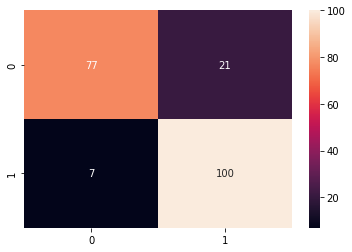

In [192]:
sns.heatmap(matrix,annot = True, fmt = "d")

fmt = d is format = default

# precision Score

In [193]:
from sklearn.metrics import precision_score

In [194]:
precision = precision_score(Y_test, Y_pred_lr)

In [195]:
print("Precision: ",precision)

Precision:  0.8264462809917356


# Recall

In [196]:
from sklearn.metrics import recall_score

In [197]:
recall = recall_score(Y_test, Y_pred_lr)

In [198]:
print("Recall is: ",recall)

Recall is:  0.9345794392523364




---



# F-Score

balance of precision and recall score

In [199]:
print((2*precision*recall)/(precision+recall))

0.8771929824561404


In [ ]:
CM = pd.crosstab(Y_test, Y_pred_nb)
CM

In [ ]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

#False negative rate of the model

In [ ]:
fnr=FN*100/(FN+TP)
fnr

# Random Forest

In [200]:
#Random forest with 100 trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


Now, let us prune the depth of trees and check the accuracy.

In [201]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, Y_test)))

Accuracy on training set: 0.885
Accuracy on test set: 0.902


In [202]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

100.0
0


In [203]:
Y_pred_rf.shape

(205,)

In [281]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random forest is: 100.0 %


performance metrics
-Accuracy: is the ratio between the number of correct predictions and total number of predications.

$acc = \frac{TP + TN}{TP + TN + FP + FN}$

-Precision: is the ratio between the number of correct positives and the number of true positives plus the number of false positives.

$Precision (p) = \frac{TP}{TP + FP}$

-Recall: is the ratio between the number of correct positives and the number of true positives plus the number of false negatives.

$recall = \frac{TP}{TP + FN}$

-F-score: is known as the harmonic mean of precision and recall.

$acc = \frac{1}{\frac{1}{2}(\frac{1}{p}+\frac{1}{r})} = \frac{2pr}{p+r}$

-Problem characteristics in context of our case study:

TP = True positive (has heart disease). TN = True negative (has no heart disease). FP = False positive (has no heart disease) FN = False negative (has heart disease)

## confusion matrix of Random Forest

In [205]:
from sklearn.metrics import confusion_matrix

In [206]:
matrix= confusion_matrix(Y_test, Y_pred_rf)

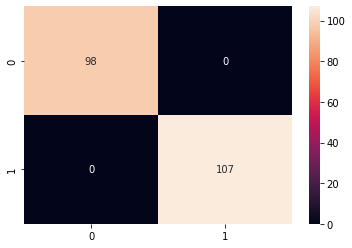

In [207]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [208]:
from sklearn.metrics import precision_score

In [209]:
precision = precision_score(Y_test, Y_pred_rf)

In [210]:
print("Precision: ",precision)

Precision:  1.0


# recall

In [211]:
from sklearn.metrics import recall_score

In [212]:
recall = recall_score(Y_test, Y_pred_rf)

In [213]:
print("Recall is: ",recall)

Recall is:  1.0


# F score

In [214]:
print((2*precision*recall)/(precision+recall))

1.0


### cm using bad style

In [215]:
CM =pd.crosstab(Y_test, Y_pred_rf)
CM

col_0,0,1
target,,
0,98,0
1,0,107


In [216]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

## False negative rate of the model

In [217]:
fnr=FN*100/(FN+TP)
fnr

0.0

# Naive Bayes

In [218]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [219]:
Y_pred_nb.shape

(205,)

In [220]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.37 %


## confusion matrix of Naive Bayes

In [221]:
from sklearn.metrics import confusion_matrix

In [222]:
matrix= confusion_matrix(Y_test, Y_pred_nb)

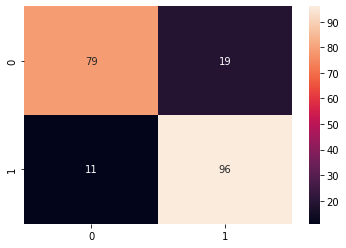

In [223]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [224]:
from sklearn.metrics import precision_score

In [225]:
precision = precision_score(Y_test, Y_pred_nb)

In [226]:
print("Precision: ",precision)

Precision:  0.8347826086956521


# recall

In [227]:
from sklearn.metrics import recall_score

In [228]:
recall = recall_score(Y_test, Y_pred_nb)

In [229]:
print("Recall is: ",recall)

Recall is:  0.897196261682243


# f score

In [230]:
print((2*precision*recall)/(precision+recall))

0.8648648648648648


### bad cm style

In [231]:
CM = pd.crosstab(Y_test, Y_pred_nb)
CM

col_0,0,1
target,,
0,79,19
1,11,96


In [232]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

## false negative rate of the model

In [233]:
fnr = FN*100/(FN+TP)
fnr

10.280373831775702

# KNN(K Nearest Neighbors)

In [234]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [235]:
Y_pred_knn.shape

(205,)

In [236]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 72.2 %


## Confusion matrix

In [237]:
from sklearn.metrics import confusion_matrix

In [238]:
matrix= confusion_matrix(Y_test, Y_pred_knn)

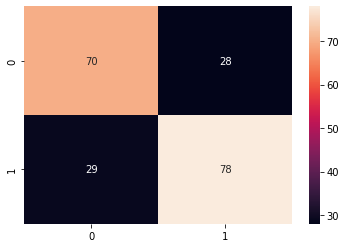

In [239]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [240]:
from sklearn.metrics import precision_score

In [241]:
precision = precision_score(Y_test, Y_pred_knn)

In [242]:
print("Precision: ",precision)

Precision:  0.7358490566037735


# recall

In [243]:
from sklearn.metrics import recall_score

In [244]:
recall = recall_score(Y_test, Y_pred_knn)

In [245]:
print("Recall is: ",recall)

Recall is:  0.7289719626168224


# f score

In [246]:
print((2*precision*recall)/(precision+recall))

0.732394366197183


### bad cm

In [247]:
CM = pd.crosstab(Y_test, Y_pred_knn)
CM

col_0,0,1
target,,
0,70,28
1,29,78


In [248]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

## false negative rate of the model

In [249]:
fnr = FN*100/(FN+TP)
fnr

27.102803738317757

## for neighbors = 4

In [250]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,Y_train)
Y_pred_knn4=knn.predict(X_test)

In [251]:
Y_pred_knn4.shape

(205,)

In [252]:
score_knn_4 = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn_4)+" %")

The accuracy score achieved using KNN is: 72.2 %


## false negative rate

In [253]:
CM = pd.crosstab(Y_test, Y_pred_knn4)
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
fnr = FN*100/(FN+TP)
fnr

27.102803738317757

# Decision Tree

In [254]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


The accuracy on the training set is 100%, while the test set accuracy is much worse. This is an indicative that the tree is overfitting and not generalizing well to new data. Therefore, we need to apply pre-pruning to the tree.

We set max_depth=3, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

In [255]:
tree1 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 0.848
Accuracy on test set: 0.844


In [256]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [257]:
print(Y_pred_dt.shape)

(205,)


# Discision Tree Visualization

In [258]:
df = pd.read_csv('heart.csv')

In [259]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [260]:
from pandas import DataFrame, Series
from IPython.display import Image 
from io import StringIO
import pydotplus
from sklearn import preprocessing

In [261]:
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

In [262]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)

### accuracy

In [264]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


## Confusion Matrix

In [265]:
from sklearn.metrics import confusion_matrix

In [266]:
matrix= confusion_matrix(Y_test, Y_pred_dt)

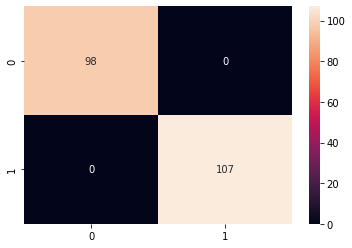

In [267]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [268]:
from sklearn.metrics import precision_score

In [269]:
precision = precision_score(Y_test, Y_pred_dt)

In [270]:
print("Precision: ",precision)

Precision:  1.0


# recall

In [271]:
from sklearn.metrics import recall_score

In [272]:
recall = recall_score(Y_test, Y_pred_dt)

In [273]:
print("Recall is: ",recall)

Recall is:  1.0


# f score

In [274]:
print((2*precision*recall)/(precision+recall))

1.0


### bad cm style

In [275]:
CM = pd.crosstab(Y_test, Y_pred_dt)
CM

col_0,0,1
target,,
0,98,0
1,0,107


## false negative rate

In [276]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
fnr = FN*100/(FN+TP)
fnr

0.0

# FINAL SCORE

In [277]:
scores = [score_lr,score_nb,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %
The accuracy score achieved using Naive Bayes is: 85.37 %
The accuracy score achieved using K-Nearest Neighbors is: 72.2 %
The accuracy score achieved using Decision Tree is: 100.0 %
The accuracy score achieved using Random Forest is: 100.0 %


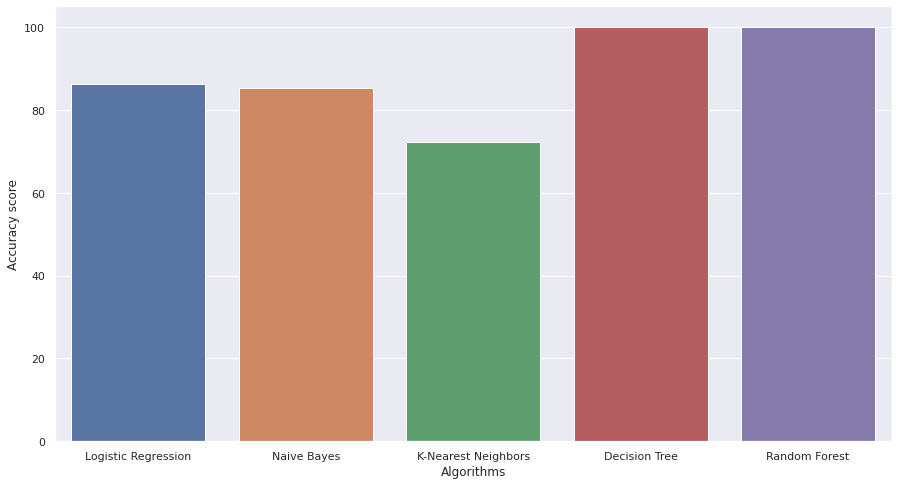

In [278]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [284]:
input_data = (59,	1,	1,	140,	221,	0	,1	,164,	1	,0.0,	2,	0,	2)

#change the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print('The person does not have a Heart Disease')
else:
    print('The person has a Heart Disease')

[1]
The person has a Heart Disease
